# Delivery Time Analysis and Prediction - **Zomato**


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "Zomato Dataset.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "saurabhbadole/zomato-delivery-operations-analytics-dataset",
  file_path,
  pandas_kwargs={'encoding': 'latin-1'}
)

print("First 5 records:", df.head())

/tmp/ipython-input-2043554551.py:8: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  df = kagglehub.load_dataset(


Using Colab cache for faster access to the 'zomato-delivery-operations-analytics-dataset' dataset.
First 5 records:        ID Delivery_person_ID  Delivery_person_Age  Delivery_person_Ratings  \
0  0xcdcd      DEHRES17DEL01                 36.0                      4.2   
1  0xd987      KOCRES16DEL01                 21.0                      4.7   
2  0x2784     PUNERES13DEL03                 23.0                      4.7   
3  0xc8b6     LUDHRES15DEL02                 34.0                      4.3   
4  0xdb64      KNPRES14DEL02                 24.0                      4.7   

   Restaurant_latitude  Restaurant_longitude  Delivery_location_latitude  \
0            30.327968             78.046106                   30.397968   
1            10.003064             76.307589                   10.043064   
2            18.562450             73.916619                   18.652450   
3            30.899584             75.809346                   30.919584   
4            26.463504             

In [ ]:
df.shape

(45584, 20)

In [ ]:
df.columns

Index(['ID', 'Delivery_person_ID', 'Delivery_person_Age',
       'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Order_Date', 'Time_Orderd',
       'Time_Order_picked', 'Weather_conditions', 'Road_traffic_density',
       'Vehicle_condition', 'Type_of_order', 'Type_of_vehicle',
       'multiple_deliveries', 'Festival', 'City', 'Time_taken (min)'],
      dtype='object')

In [ ]:
df.dtypes

,0
ID,object
Delivery_person_ID,object
Delivery_person_Age,float64
Delivery_person_Ratings,float64
Restaurant_latitude,float64
Restaurant_longitude,float64
Delivery_location_latitude,float64
Delivery_location_longitude,float64
Order_Date,object
Time_Orderd,object


In [ ]:
df.describe()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Vehicle_condition,multiple_deliveries,Time_taken (min)
count,43730.000000,43676.000000,45584.000000,45584.000000,45584.000000,45584.000000,45584.000000,44591.000000,45584.000000
mean,29.566911,4.633774,17.017948,70.229684,17.465480,70.844161,1.023385,0.744635,26.293963
std,5.815064,0.334744,8.185674,22.885575,7.335562,21.120578,0.839055,0.572510,9.384298
min,15.000000,1.000000,-30.905562,-88.366217,0.010000,0.010000,0.000000,0.000000,10.000000
25%,25.000000,4.500000,12.933284,73.170000,12.988453,73.280000,0.000000,0.000000,19.000000
50%,30.000000,4.700000,18.551440,75.897963,18.633934,76.002574,1.000000,1.000000,26.000000
75%,35.000000,4.900000,22.728163,78.044095,22.785049,78.107044,2.000000,1.000000,32.000000
max,50.000000,6.000000,30.914057,88.433452,31.054057,88.563452,3.000000,3.000000,54.000000


In [ ]:
#formatting the order date
df['Order_Date'] = pd.to_datetime(df['Order_Date'], format ='%d-%m-%Y', errors='coerce')

In [ ]:
#formatting the time_orderd and time_order_picked
df['Time_Orderd'] = pd.to_datetime(df['Time_Orderd'], format='%H:%M', errors='coerce')
df['Time_Order_picked'] = pd.to_datetime(df['Time_Order_picked'], format='%H:%M', errors='coerce')

In [ ]:
#fiiling the delivery person age and rating with mean
df['Delivery_person_Age'] = df['Delivery_person_Age'].fillna(df['Delivery_person_Age'].mean())
df['Delivery_person_Ratings'] = df['Delivery_person_Ratings'].fillna(df['Delivery_person_Ratings'].mean())

In [ ]:
df.isnull().sum()

,0
ID,0
Delivery_person_ID,0
Delivery_person_Age,0
Delivery_person_Ratings,0
Restaurant_latitude,0
Restaurant_longitude,0
Delivery_location_latitude,0
Delivery_location_longitude,0
Order_Date,0
Time_Orderd,5799


In [ ]:
#avg time between order placed and picked
df['btw_time']= df['Time_Order_picked'] - df['Time_Orderd']

In [ ]:
df.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,...,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min),btw_time
0,0xcdcd,DEHRES17DEL01,36.0,4.2,30.327968,78.046106,30.397968,78.116106,2022-02-12,1900-01-01 21:55:00,...,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46,0 days 00:15:00
1,0xd987,KOCRES16DEL01,21.0,4.7,10.003064,76.307589,10.043064,76.347589,2022-02-13,1900-01-01 14:55:00,...,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23,0 days 00:10:00
2,0x2784,PUNERES13DEL03,23.0,4.7,18.562450,73.916619,18.652450,74.006619,2022-03-04,1900-01-01 17:30:00,...,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21,0 days 00:10:00
3,0xc8b6,LUDHRES15DEL02,34.0,4.3,30.899584,75.809346,30.919584,75.829346,2022-02-13,1900-01-01 09:20:00,...,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20,0 days 00:10:00
4,0xdb64,KNPRES14DEL02,24.0,4.7,26.463504,80.372929,26.593504,80.502929,2022-02-14,1900-01-01 19:50:00,...,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41,0 days 00:15:00


In [ ]:
df['btw_time'].mean()

Timedelta('0 days 00:09:56.695568672')

In [ ]:
#filling missing vakues of time_order_picked and time_ordered
def fill_missing_times(row):
    time_ordered = row['Time_Orderd']
    time_picked = row['Time_Order_picked']

    if pd.isna(time_picked) and pd.notna(time_ordered):
        # If Time_Order_picked is missing, fill with Time_Orderd + 10 minutes
        row['Time_Order_picked'] = time_ordered + pd.Timedelta(minutes=10)
    elif pd.isna(time_ordered) and pd.notna(time_picked):
        # If Time_Orderd is missing, fill with Time_Order_picked - 10 minutes
        row['Time_Orderd'] = time_picked - pd.Timedelta(minutes=10)
    # If both are NaN, leave as is (no action needed)

    return row

df = df.apply(fill_missing_times, axis=1)

In [ ]:
df.shape

(45584, 21)

In [ ]:
df.isnull().sum()

,0
ID,0
Delivery_person_ID,0
Delivery_person_Age,0
Delivery_person_Ratings,0
Restaurant_latitude,0
Restaurant_longitude,0
Delivery_location_latitude,0
Delivery_location_longitude,0
Order_Date,0
Time_Orderd,629


In [ ]:
df = df.drop('btw_time', axis=1)
display(df.head())

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min)
0,0xcdcd,DEHRES17DEL01,36.0,4.2,30.327968,78.046106,30.397968,78.116106,2022-02-12,1900-01-01 21:55:00,1900-01-01 22:10:00,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46
1,0xd987,KOCRES16DEL01,21.0,4.7,10.003064,76.307589,10.043064,76.347589,2022-02-13,1900-01-01 14:55:00,1900-01-01 15:05:00,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23
2,0x2784,PUNERES13DEL03,23.0,4.7,18.562450,73.916619,18.652450,74.006619,2022-03-04,1900-01-01 17:30:00,1900-01-01 17:40:00,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21
3,0xc8b6,LUDHRES15DEL02,34.0,4.3,30.899584,75.809346,30.919584,75.829346,2022-02-13,1900-01-01 09:20:00,1900-01-01 09:30:00,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20
4,0xdb64,KNPRES14DEL02,24.0,4.7,26.463504,80.372929,26.593504,80.502929,2022-02-14,1900-01-01 19:50:00,1900-01-01 20:05:00,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41


In [ ]:
df.isnull().sum()

,0
ID,0
Delivery_person_ID,0
Delivery_person_Age,0
Delivery_person_Ratings,0
Restaurant_latitude,0
Restaurant_longitude,0
Delivery_location_latitude,0
Delivery_location_longitude,0
Order_Date,0
Time_Orderd,629


In [ ]:
df.shape

(45584, 20)

In [ ]:
!pip install haversine

In [ ]:
from haversine import haversine, Unit

def calculate_distance(row):
  coords_restaurant = (row['Restaurant_latitude'], row['Restaurant_longitude'])
  coords_delivery = (row['Delivery_location_latitude'], row['Delivery_location_longitude'])
  return haversine(coords_restaurant, coords_delivery, unit=Unit.KILOMETERS)

df['distance'] = df.apply(calculate_distance, axis=1)

In [ ]:
df.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,...,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min),distance
0,0xcdcd,DEHRES17DEL01,36.0,4.2,30.327968,78.046106,30.397968,78.116106,2022-02-12,1900-01-01 21:55:00,...,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46,10.280596
1,0xd987,KOCRES16DEL01,21.0,4.7,10.003064,76.307589,10.043064,76.347589,2022-02-13,1900-01-01 14:55:00,...,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23,6.242327
2,0x2784,PUNERES13DEL03,23.0,4.7,18.562450,73.916619,18.652450,74.006619,2022-03-04,1900-01-01 17:30:00,...,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21,13.787879
3,0xc8b6,LUDHRES15DEL02,34.0,4.3,30.899584,75.809346,30.919584,75.829346,2022-02-13,1900-01-01 09:20:00,...,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20,2.930262
4,0xdb64,KNPRES14DEL02,24.0,4.7,26.463504,80.372929,26.593504,80.502929,2022-02-14,1900-01-01 19:50:00,...,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41,19.396645


In [ ]:
df.nunique()

,0
ID,45584
Delivery_person_ID,1320
Delivery_person_Age,23
Delivery_person_Ratings,29
Restaurant_latitude,657
Restaurant_longitude,518
Delivery_location_latitude,4373
Delivery_location_longitude,4373
Order_Date,44
Time_Orderd,191


In [ ]:
df.describe()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Vehicle_condition,multiple_deliveries,Time_taken (min),distance
count,45584.000000,45584.000000,45584.000000,45584.000000,45584.000000,45584.000000,45584,44955,44955,45584.000000,44591.000000,45584.000000,45584.000000
mean,29.566911,4.633774,17.017948,70.229684,17.465480,70.844161,2022-03-13 16:31:17.711477760,1900-01-01 18:05:14.521187840,1900-01-01 18:15:11.918585600,1.023385,0.744635,26.293963,99.321457
min,15.000000,1.000000,-30.905562,-88.366217,0.010000,0.010000,2022-02-11 00:00:00,1900-01-01 08:05:00,1900-01-01 08:15:00,0.000000,0.000000,10.000000,1.465069
25%,25.000000,4.600000,12.933284,73.170000,12.988453,73.280000,2022-03-04 00:00:00,1900-01-01 15:45:00,1900-01-01 15:55:00,0.000000,0.000000,19.000000,4.663500
50%,29.566911,4.700000,18.551440,75.897963,18.633934,76.002574,2022-03-15 00:00:00,1900-01-01 19:15:00,1900-01-01 19:25:00,1.000000,1.000000,26.000000,9.264369
75%,34.000000,4.800000,22.728163,78.044095,22.785049,78.107044,2022-03-27 00:00:00,1900-01-01 21:35:00,1900-01-01 21:45:00,2.000000,1.000000,32.000000,13.763996
max,50.000000,6.000000,30.914057,88.433452,31.054057,88.563452,2022-04-06 00:00:00,1900-01-01 23:55:00,1900-01-02 00:05:00,3.000000,3.000000,54.000000,19692.701807
std,5.695578,0.327663,8.185674,22.885575,7.335562,21.120578,NaN,NaN,NaN,0.839055,0.572510,9.384298,1099.840658




# **EDA and Feature Engineering**

Create a feture called age bins basically,categorizing drivers into different age categories



In [ ]:
# Define the bins and labels for driver ages
bins = range(20, 41, 5)
labels = [f'{i}-{i+5}' for i in bins[:-1]]

# Create the new 'Age_Bin' column
df['Age_Bin'] = pd.cut(df['Delivery_person_Age'], bins=bins, labels=labels, right=False, include_lowest=True)

# Display the first few rows with the new column and the value counts
display(df.head())
display(df['Age_Bin'].value_counts())

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,...,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min),distance,Age_Bin
0,0xcdcd,DEHRES17DEL01,36.0,4.2,30.327968,78.046106,30.397968,78.116106,2022-02-12,1900-01-01 21:55:00,...,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46,10.280596,35-40
1,0xd987,KOCRES16DEL01,21.0,4.7,10.003064,76.307589,10.043064,76.347589,2022-02-13,1900-01-01 14:55:00,...,High,1,Meal,motorcycle,1.0,No,Metropolitian,23,6.242327,20-25
2,0x2784,PUNERES13DEL03,23.0,4.7,18.562450,73.916619,18.652450,74.006619,2022-03-04,1900-01-01 17:30:00,...,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21,13.787879,20-25
3,0xc8b6,LUDHRES15DEL02,34.0,4.3,30.899584,75.809346,30.919584,75.829346,2022-02-13,1900-01-01 09:20:00,...,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20,2.930262,30-35
4,0xdb64,KNPRES14DEL02,24.0,4.7,26.463504,80.372929,26.593504,80.502929,2022-02-14,1900-01-01 19:50:00,...,Jam,1,Snack,scooter,1.0,No,Metropolitian,41,19.396645,20-25


,count
Age_Bin,
25-30,12707
35-40,11109
30-35,10898
20-25,10779


Creating Bins using 2 hour time slot to later on categorize the time as peak hour/ non-peak hour

In [ ]:
# Extract the time component from the 'Time_Orderd' column
df['Order_Time_Only'] = df['Time_Orderd'].dt.time

# Define the time bins and labels to cover the whole day
time_bins = [pd.to_datetime('00:00').time(), pd.to_datetime('02:00').time(),
             pd.to_datetime('04:00').time(), pd.to_datetime('06:00').time(),
             pd.to_datetime('08:00').time(), pd.to_datetime('10:00').time(),
             pd.to_datetime('12:00').time(), pd.to_datetime('14:00').time(),
             pd.to_datetime('16:00').time(), pd.to_datetime('18:00').time(),
             pd.to_datetime('20:00').time(), pd.to_datetime('22:00').time(),
             pd.to_datetime('23:59').time()] # Use 23:59 to include times up to midnight

time_labels = ['00:01-02:00', '02:01-04:00', '04:01-06:00', '06:01-08:00',
               '08:01-10:00', '10:01-12:00', '12:01-14:00', '14:01-16:00',
               '16:01-18:00', '18:01-20:00', '20:01-22:00', '22:01-23:59']

# Temporarily drop rows with NaT in 'Order_Time_Only' for binning
df_cleaned_time = df.dropna(subset=['Order_Time_Only']).copy()

# Create the new 'Time_Bin' column on the temporary DataFrame
df_cleaned_time['Time_Bin'] = pd.cut(df_cleaned_time['Order_Time_Only'], bins=time_bins, labels=time_labels, right=False, include_lowest=True, ordered=False)

# Merge the new 'Time_Bin' column back to the original DataFrame
df = df.merge(df_cleaned_time[['ID', 'Time_Bin']], on='ID', how='left')


# Display the first few rows with the new column and the value counts
display(df.head())
display(df['Time_Bin'].value_counts().sort_index())

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,...,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min),distance,Age_Bin,Order_Time_Only,Time_Bin
0,0xcdcd,DEHRES17DEL01,36.0,4.2,30.327968,78.046106,30.397968,78.116106,2022-02-12,1900-01-01 21:55:00,...,Snack,motorcycle,3.0,No,Metropolitian,46,10.280596,35-40,21:55:00,20:01-22:00
1,0xd987,KOCRES16DEL01,21.0,4.7,10.003064,76.307589,10.043064,76.347589,2022-02-13,1900-01-01 14:55:00,...,Meal,motorcycle,1.0,No,Metropolitian,23,6.242327,20-25,14:55:00,14:01-16:00
2,0x2784,PUNERES13DEL03,23.0,4.7,18.562450,73.916619,18.652450,74.006619,2022-03-04,1900-01-01 17:30:00,...,Drinks,scooter,1.0,No,Metropolitian,21,13.787879,20-25,17:30:00,16:01-18:00
3,0xc8b6,LUDHRES15DEL02,34.0,4.3,30.899584,75.809346,30.919584,75.829346,2022-02-13,1900-01-01 09:20:00,...,Buffet,motorcycle,0.0,No,Metropolitian,20,2.930262,30-35,09:20:00,08:01-10:00
4,0xdb64,KNPRES14DEL02,24.0,4.7,26.463504,80.372929,26.593504,80.502929,2022-02-14,1900-01-01 19:50:00,...,Snack,scooter,1.0,No,Metropolitian,41,19.396645,20-25,19:50:00,18:01-20:00


,count
Time_Bin,
00:01-02:00,0
02:01-04:00,0
04:01-06:00,0
06:01-08:00,0
08:01-10:00,3997
10:01-12:00,4068
12:01-14:00,1701
14:01-16:00,1717
16:01-18:00,5276


Creating a column called peak-hour, if no of orders >= 5000 corresponding to the time-bin we categorize it as peak hour/non-peak hour
making a column called peak-hour and giving yes/no as values

In [ ]:
# Determine which time bins have more than 5000 orders
peak_hours = df['Time_Bin'].value_counts()[df['Time_Bin'].value_counts() >= 5000].index.tolist()

# Create the 'peak hour' column
df['peak_hour'] = df['Time_Bin'].apply(lambda x: 'Yes' if x in peak_hours else 'No')

# Display the first few rows with the new column and the value counts
display(df.head())
display(df['peak_hour'].value_counts())

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,...,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min),distance,Age_Bin,Order_Time_Only,Time_Bin,peak_hour
0,0xcdcd,DEHRES17DEL01,36.0,4.2,30.327968,78.046106,30.397968,78.116106,2022-02-12,1900-01-01 21:55:00,...,motorcycle,3.0,No,Metropolitian,46,10.280596,35-40,21:55:00,20:01-22:00,Yes
1,0xd987,KOCRES16DEL01,21.0,4.7,10.003064,76.307589,10.043064,76.347589,2022-02-13,1900-01-01 14:55:00,...,motorcycle,1.0,No,Metropolitian,23,6.242327,20-25,14:55:00,14:01-16:00,No
2,0x2784,PUNERES13DEL03,23.0,4.7,18.562450,73.916619,18.652450,74.006619,2022-03-04,1900-01-01 17:30:00,...,scooter,1.0,No,Metropolitian,21,13.787879,20-25,17:30:00,16:01-18:00,Yes
3,0xc8b6,LUDHRES15DEL02,34.0,4.3,30.899584,75.809346,30.919584,75.829346,2022-02-13,1900-01-01 09:20:00,...,motorcycle,0.0,No,Metropolitian,20,2.930262,30-35,09:20:00,08:01-10:00,No
4,0xdb64,KNPRES14DEL02,24.0,4.7,26.463504,80.372929,26.593504,80.502929,2022-02-14,1900-01-01 19:50:00,...,scooter,1.0,No,Metropolitian,41,19.396645,20-25,19:50:00,18:01-20:00,Yes


,count
peak_hour,
Yes,33472
No,11483


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

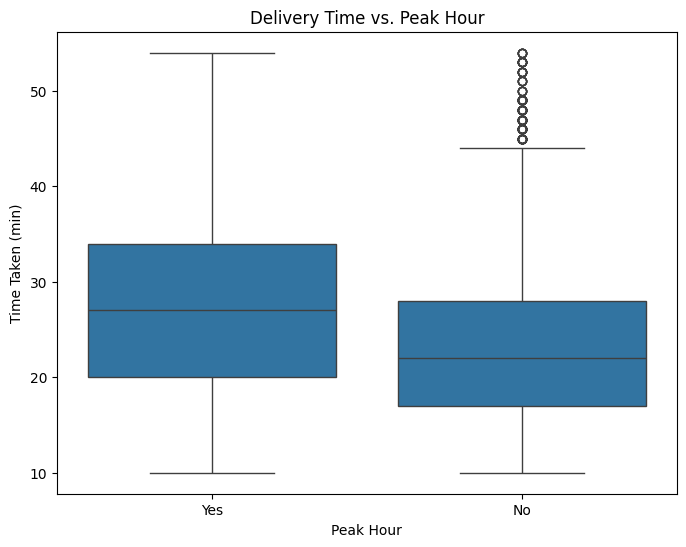

In [ ]:

plt.figure(figsize=(8, 6))
sns.boxplot(x='peak_hour', y='Time_taken (min)', data=df)
plt.title('Delivery Time vs. Peak Hour')
plt.xlabel('Peak Hour')
plt.ylabel('Time Taken (min)')
plt.show()

/tmp/ipython-input-2998316588.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_time_per_age_bin = df.groupby('Age_Bin')['Time_taken (min)'].mean().reset_index()


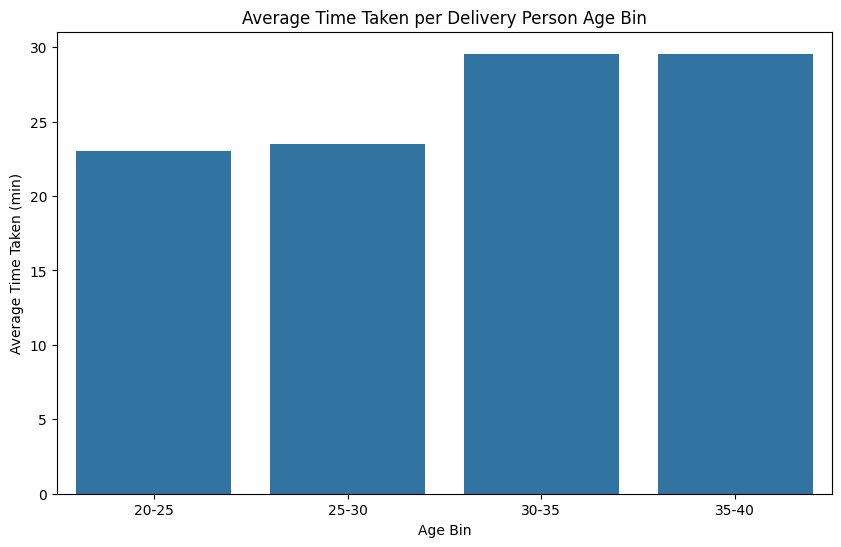

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the average time taken per age bin
avg_time_per_age_bin = df.groupby('Age_Bin')['Time_taken (min)'].mean().reset_index()

# Plot the average time taken per age bin
plt.figure(figsize=(10, 6))
sns.barplot(x='Age_Bin', y='Time_taken (min)', data=avg_time_per_age_bin, order=avg_time_per_age_bin['Age_Bin'])
plt.title('Average Time Taken per Delivery Person Age Bin')
plt.xlabel('Age Bin')
plt.ylabel('Average Time Taken (min)')
plt.show()

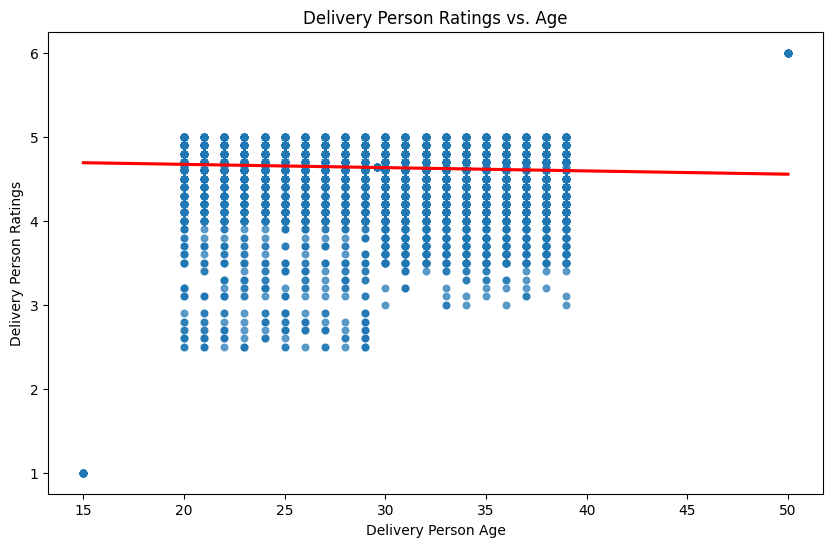

In [ ]:

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Delivery_person_Age', y='Delivery_person_Ratings', data=df, alpha=0.6)
sns.regplot(x='Delivery_person_Age', y='Delivery_person_Ratings', data=df, scatter_kws={'s': 20, 'alpha': 0.3}, line_kws={'color': 'red'})
plt.title('Delivery Person Ratings vs. Age')
plt.xlabel('Delivery Person Age')
plt.ylabel('Delivery Person Ratings')
plt.show()

In [ ]:
df['good_rating'] = df['Delivery_person_Ratings'].apply(lambda x: 'Yes' if x > 4.5 else 'No')
display(df.head())
display(df['good_rating'].value_counts())

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,...,Festival,City,Time_taken (min),distance,Age_Bin,Order_Time_Only,Time_Bin,peak_hour,month,good_rating
0,0xcdcd,DEHRES17DEL01,36.0,4.2,30.327968,78.046106,30.397968,78.116106,2022-02-12,1900-01-01 21:55:00,...,No,Metropolitian,46,10.280596,35-40,21:55:00,20:01-22:00,Yes,2,No
1,0xd987,KOCRES16DEL01,21.0,4.7,10.003064,76.307589,10.043064,76.347589,2022-02-13,1900-01-01 14:55:00,...,No,Metropolitian,23,6.242327,20-25,14:55:00,14:01-16:00,No,2,Yes
2,0x2784,PUNERES13DEL03,23.0,4.7,18.562450,73.916619,18.652450,74.006619,2022-03-04,1900-01-01 17:30:00,...,No,Metropolitian,21,13.787879,20-25,17:30:00,16:01-18:00,Yes,3,Yes
3,0xc8b6,LUDHRES15DEL02,34.0,4.3,30.899584,75.809346,30.919584,75.829346,2022-02-13,1900-01-01 09:20:00,...,No,Metropolitian,20,2.930262,30-35,09:20:00,08:01-10:00,No,2,No
4,0xdb64,KNPRES14DEL02,24.0,4.7,26.463504,80.372929,26.593504,80.502929,2022-02-14,1900-01-01 19:50:00,...,No,Metropolitian,41,19.396645,20-25,19:50:00,18:01-20:00,Yes,2,Yes


,count
good_rating,
Yes,33836
No,11317


In [ ]:
df['month'] = df['Order_Date'].dt.month
display(df.head())

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,...,multiple_deliveries,Festival,City,Time_taken (min),distance,Age_Bin,Order_Time_Only,Time_Bin,peak_hour,month
0,0xcdcd,DEHRES17DEL01,36.0,4.2,30.327968,78.046106,30.397968,78.116106,2022-02-12,1900-01-01 21:55:00,...,3.0,No,Metropolitian,46,10.280596,35-40,21:55:00,20:01-22:00,Yes,2
1,0xd987,KOCRES16DEL01,21.0,4.7,10.003064,76.307589,10.043064,76.347589,2022-02-13,1900-01-01 14:55:00,...,1.0,No,Metropolitian,23,6.242327,20-25,14:55:00,14:01-16:00,No,2
2,0x2784,PUNERES13DEL03,23.0,4.7,18.562450,73.916619,18.652450,74.006619,2022-03-04,1900-01-01 17:30:00,...,1.0,No,Metropolitian,21,13.787879,20-25,17:30:00,16:01-18:00,Yes,3
3,0xc8b6,LUDHRES15DEL02,34.0,4.3,30.899584,75.809346,30.919584,75.829346,2022-02-13,1900-01-01 09:20:00,...,0.0,No,Metropolitian,20,2.930262,30-35,09:20:00,08:01-10:00,No,2
4,0xdb64,KNPRES14DEL02,24.0,4.7,26.463504,80.372929,26.593504,80.502929,2022-02-14,1900-01-01 19:50:00,...,1.0,No,Metropolitian,41,19.396645,20-25,19:50:00,18:01-20:00,Yes,2


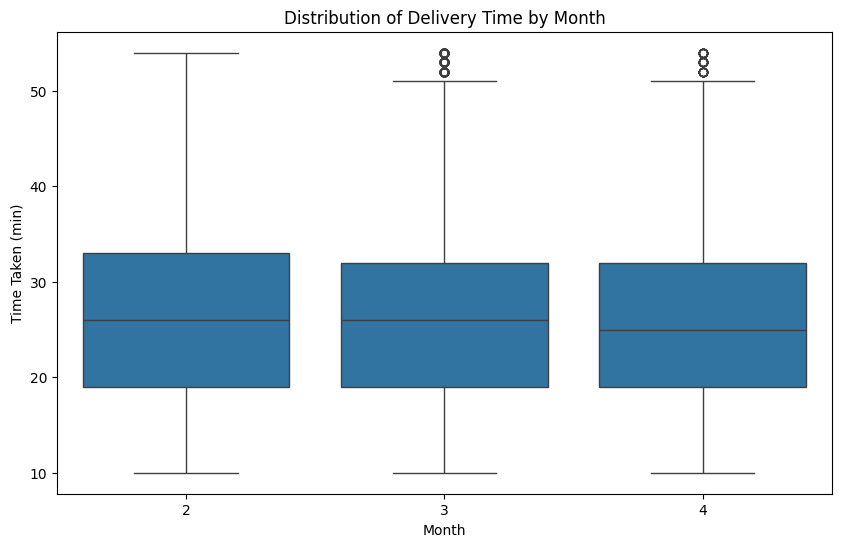

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(x='month', y='Time_taken (min)', data=df)
plt.title('Distribution of Delivery Time by Month')
plt.xlabel('Month')
plt.ylabel('Time Taken (min)')
plt.show()

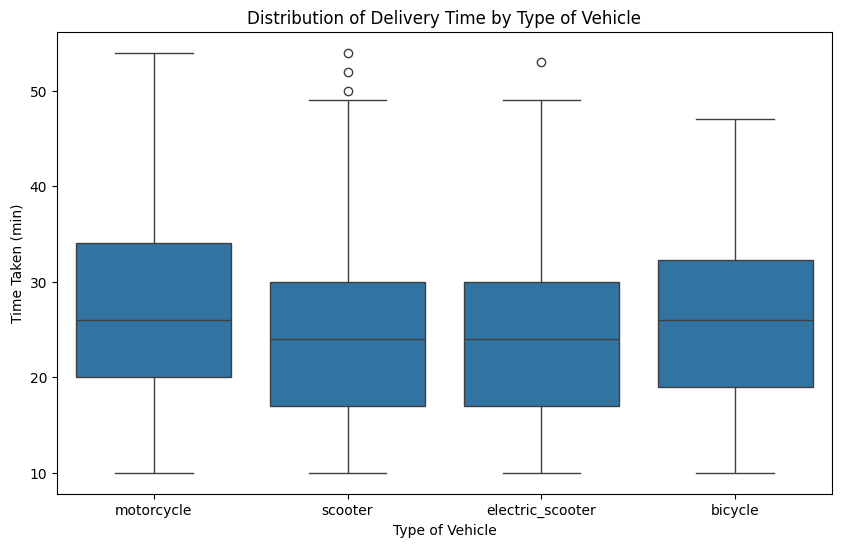

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(x='Type_of_vehicle', y='Time_taken (min)', data=df)
plt.title('Distribution of Delivery Time by Type of Vehicle')
plt.xlabel('Type of Vehicle')
plt.ylabel('Time Taken (min)')
plt.show()

In [ ]:
average_time_per_vehicle = df.groupby('Type_of_vehicle')['Time_taken (min)'].mean()
display(average_time_per_vehicle)

,Time_taken (min)
Type_of_vehicle,
bicycle,26.426471
electric_scooter,24.470110
motorcycle,27.605774
scooter,24.478819


In [ ]:
# Calculate Q1, Q3, and IQR for the 'distance' column
Q1 = df['distance'].quantile(0.25)
Q3 = df['distance'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outlier detection
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the DataFrame to remove outliers
df = df[(df['distance'] >= lower_bound) & (df['distance'] <= upper_bound)].copy()

# Display the shape of the DataFrame before and after removing outliers
print("Shape of DataFrame before removing outliers:", df.shape)

Shape of DataFrame before removing outliers: (45153, 26)


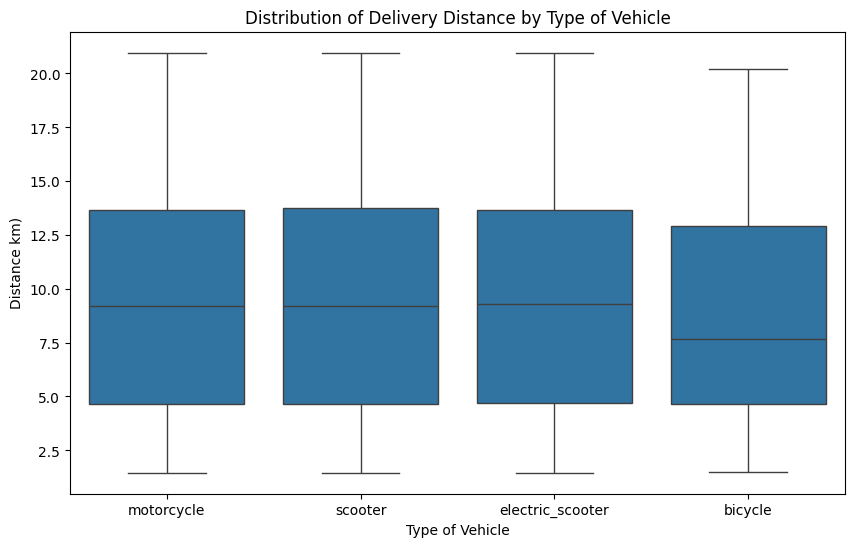

In [ ]:
#NH: avg distance delivered for each vehicle type is same
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(x='Type_of_vehicle', y='distance', data=df)
plt.title('Distribution of Delivery Distance by Type of Vehicle')
plt.xlabel('Type of Vehicle')
plt.ylabel('Distance km)')
plt.show()

In [ ]:
average_time_per_vehicle = df.groupby('Type_of_vehicle')['multiple_deliveries'].mean()
display(average_time_per_vehicle)

,multiple_deliveries
Type_of_vehicle,
bicycle,0.803922
electric_scooter,0.702644
motorcycle,0.779728
scooter,0.693637


In [ ]:
vehicle_counts = df['Type_of_vehicle'].value_counts()
display(vehicle_counts)

,count
Type_of_vehicle,
motorcycle,26230
scooter,15122
electric_scooter,3750
bicycle,51


In [ ]:
# Select the latitude and longitude columns for restaurants
restaurant_locations = df[['Restaurant_latitude', 'Restaurant_longitude']]

# Count the number of unique combinations of latitude and longitude
num_unique_restaurants = restaurant_locations.drop_duplicates().shape[0]

print(f"The number of unique restaurants based on latitude and longitude is: {num_unique_restaurants}")

The number of unique restaurants based on latitude and longitude is: 389


In [ ]:
# Group by restaurant location and calculate the number of orders and average time taken
restaurant_summary = df.groupby(['Restaurant_latitude', 'Restaurant_longitude']).agg(
    number_of_orders=('ID', 'count'),
    average_delivery_time=('Time_taken (min)', 'mean')
).reset_index()

# Display the summary
display(restaurant_summary.head())

,Restaurant_latitude,Restaurant_longitude,number_of_orders,average_delivery_time
0,0.000000,0.000000,3640,26.099451
1,9.957144,76.296783,41,26.390244
2,9.959778,76.296106,39,26.692308
3,9.960846,76.293936,27,26.444444
4,9.966783,76.242981,31,25.064516


In [ ]:
# Filter out the row where both latitude and longitude are 0.0
restaurant_summary = restaurant_summary[(restaurant_summary['Restaurant_latitude'] != 0.0) | (restaurant_summary['Restaurant_longitude'] != 0.0)].copy()

# Display the head and shape of the updated summary
display(restaurant_summary.head())
display(restaurant_summary.shape)

,Restaurant_latitude,Restaurant_longitude,number_of_orders,average_delivery_time
1,9.957144,76.296783,41,26.390244
2,9.959778,76.296106,39,26.692308
3,9.960846,76.293936,27,26.444444
4,9.966783,76.242981,31,25.064516
5,9.970717,76.285447,30,25.900000


(388, 4)

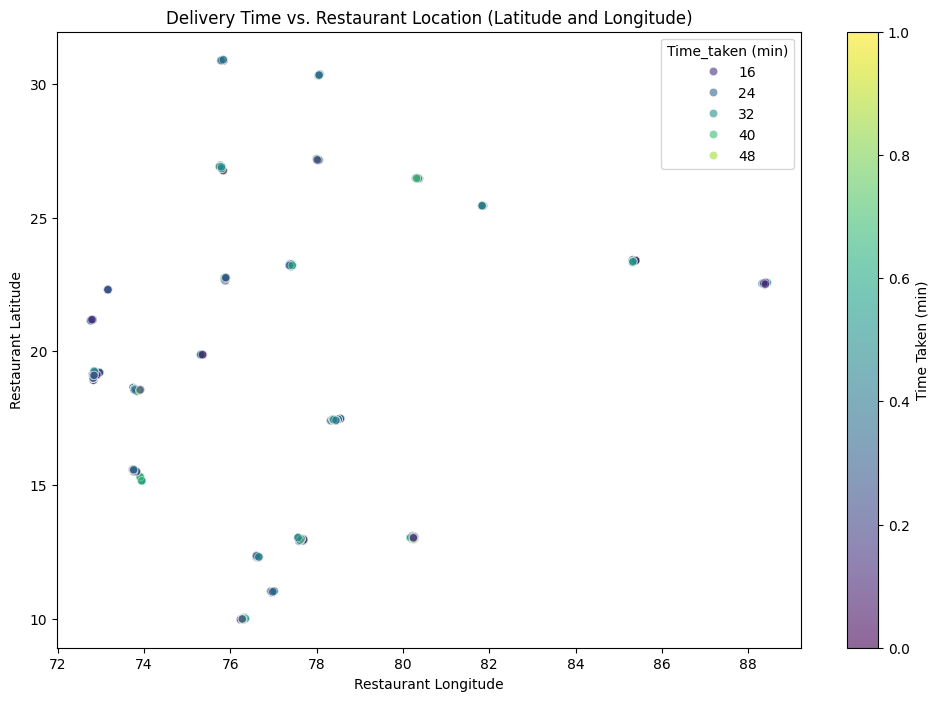

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter out the row where both latitude and longitude are 0.0
df_filtered = df[(df['Restaurant_latitude'] != 0.0) | (df['Restaurant_longitude'] != 0.0)].copy()

plt.figure(figsize=(12, 8))
scatter = sns.scatterplot(x='Restaurant_longitude', y='Restaurant_latitude', hue='Time_taken (min)', data=df_filtered, palette='viridis', alpha=0.6)
plt.title('Delivery Time vs. Restaurant Location (Latitude and Longitude)')
plt.xlabel('Restaurant Longitude')
plt.ylabel('Restaurant Latitude')
plt.colorbar(scatter.collections[0], label='Time Taken (min)')
plt.show()

In [ ]:
display(restaurant_summary.describe())

,Restaurant_latitude,Restaurant_longitude,number_of_orders,average_delivery_time
count,388.000000,388.000000,388.000000,388.000000
mean,20.055538,77.495354,106.992268,26.393035
std,6.061437,3.869839,61.101580,1.080917
min,9.957144,72.768726,27.000000,22.857143
25%,13.085298,75.357652,36.000000,25.763219
50%,21.149752,76.637449,151.000000,26.349833
75%,23.403636,78.405191,159.000000,27.021849
max,30.914057,88.433452,182.000000,30.000000


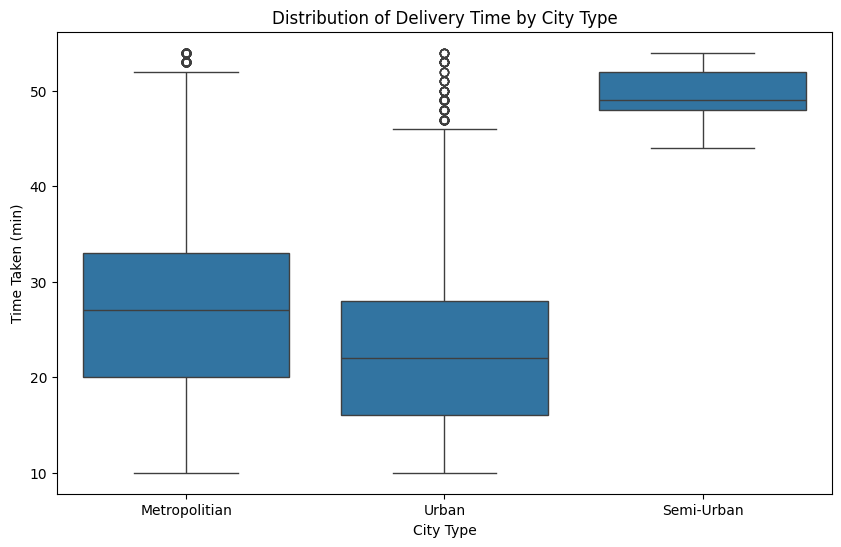

In [ ]:

plt.figure(figsize=(10, 6))
sns.boxplot(x='City', y='Time_taken (min)', data=df)
plt.title('Distribution of Delivery Time by City Type')
plt.xlabel('City Type')
plt.ylabel('Time Taken (min)')
plt.show()

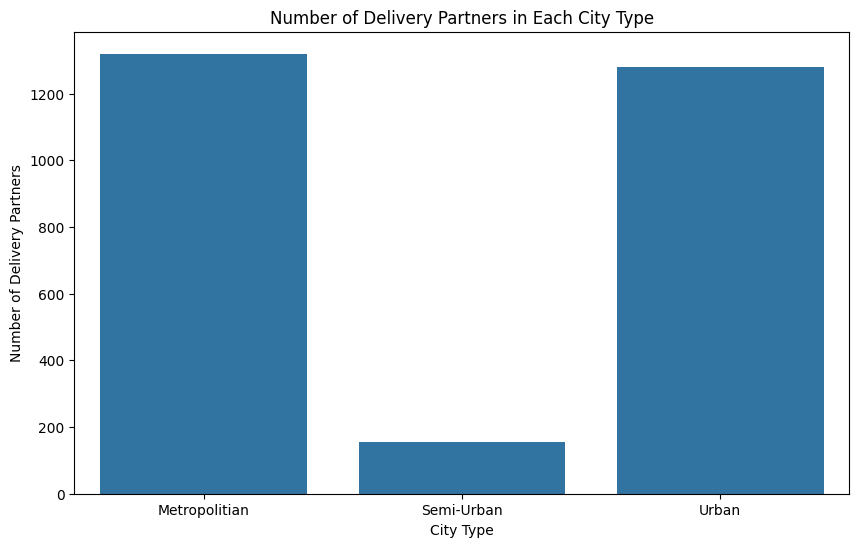

In [ ]:


# Count the number of unique delivery persons in each city type
delivery_partners_by_city = df.groupby('City')['Delivery_person_ID'].nunique().reset_index()

# Plot the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='City', y='Delivery_person_ID', data=delivery_partners_by_city)
plt.title('Number of Delivery Partners in Each City Type')
plt.xlabel('City Type')
plt.ylabel('Number of Delivery Partners')
plt.show()

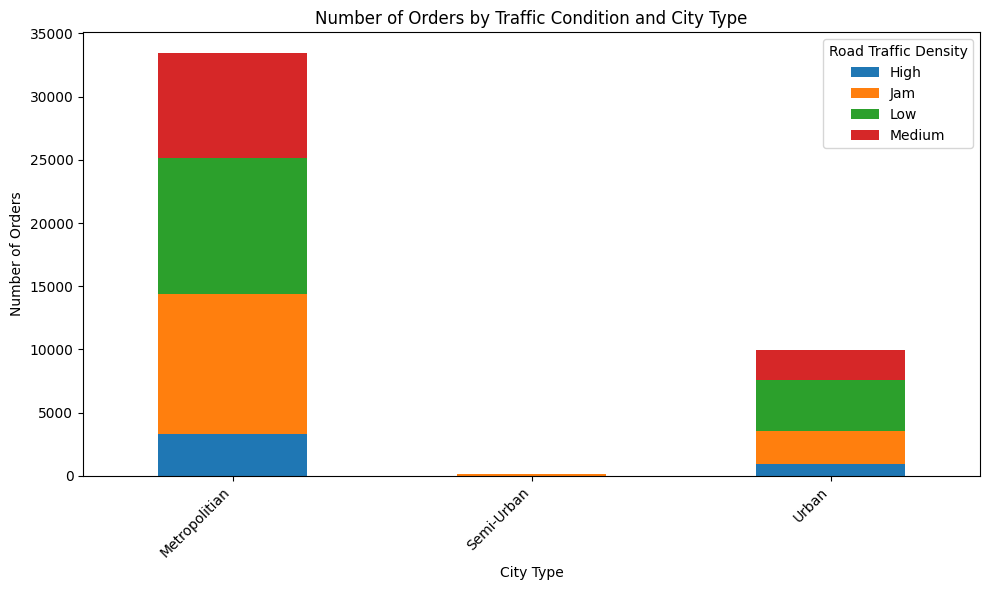

In [ ]:
# Group by City and Road_traffic_density and count occurrences
traffic_city_counts = df.groupby(['City', 'Road_traffic_density']).size().unstack(fill_value=0)

# Plot the stacked bar plot
traffic_city_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Number of Orders by Traffic Condition and City Type')
plt.xlabel('City Type')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Road Traffic Density')
plt.tight_layout()
plt.show()

In [ ]:
# Group by City and calculate the average distance, average multiple deliveries, and average time taken
city_metrics = df.groupby('City').agg(
    average_distance=('distance', 'mean'),
    average_multiple_deliveries=('multiple_deliveries', 'mean'),
    average_time_taken=('Time_taken (min)', 'mean')
).reset_index()

# Display the resulting DataFrame
display(city_metrics)

,City,average_distance,average_multiple_deliveries,average_time_taken
0,Metropolitian,9.931333,0.766945,27.316794
1,Semi-Urban,12.958904,1.487654,49.734568
2,Urban,9.084615,0.667621,22.983747


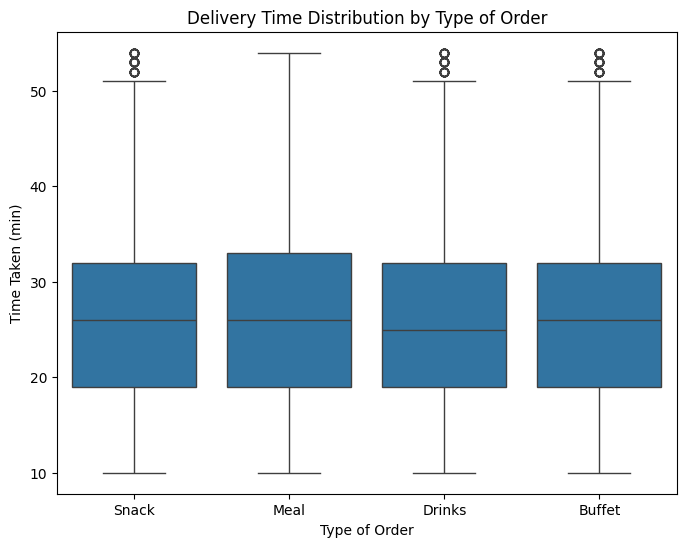

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Type_of_order', y='Time_taken (min)', data=df)
plt.title('Delivery Time Distribution by Type of Order')
plt.xlabel('Type of Order')
plt.ylabel('Time Taken (min)')
plt.show()

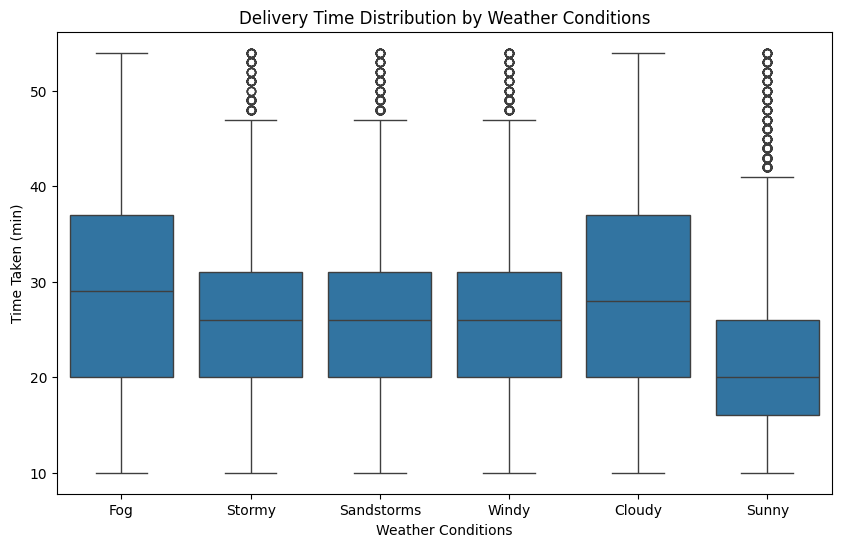

In [ ]:


plt.figure(figsize=(10, 6))
sns.boxplot(x='Weather_conditions', y='Time_taken (min)', data=df)
plt.title('Delivery Time Distribution by Weather Conditions')
plt.xlabel('Weather Conditions')
plt.ylabel('Time Taken (min)')
plt.show()

##  Conclusions (Based on EDA)

Based on the exploratory data analysis:

**1. Delivery Time and Age of Drivers:**
- The scatter plot of Delivery Time vs. Delivery Person Age and the regression line suggest a slight positive trend, indicating that older delivery persons tend to have slightly longer delivery times.

**2. Delivery Time and Delivery Person Ratings:**
- The boxplot of Delivery Time Distribution by Delivery Person Good Rating clearly shows that delivery persons categorized as having a 'Good Rating' (based on the mean rating) generally have shorter delivery times compared to those with a 'Not Good Rating'.

**3. Delivery Person Ratings and Vehicle Condition:**
- The boxplot of Delivery Person Ratings by Vehicle Condition indicates that there are differences in the distribution of ratings across different vehicle conditions.

**4. Delivery Person Ratings and Age:**
- The scatter plot of Delivery Person Ratings vs. Age shows a weak, slightly negative trend, suggesting that as age increases, ratings tend to slightly decrease. The Pearson correlation coefficient was close to zero, supporting a weak linear relationship.

**5. Delivery Time and Weather Conditions:**
- The boxplot of Delivery Time Distribution by Weather Conditions reveals variations in delivery times across different weather conditions. Some weather conditions appear to be associated with longer delivery times than others.

**6. Delivery Time and Peak Hour:**
- The boxplot of Delivery Time vs. Peak Hour clearly demonstrates that delivery times are generally longer during peak hours compared to non-peak hours.
- This is potentially because no of orders per delivery partner increases in peak hour

**7. Delivery Time and City Type:**
- The boxplot of Delivery Time Distribution by City Type shows noticeable differences in delivery times across the city types. Semi-Urban areas appear to have longer delivery times on average compared to Metropolitan and Urban areas.
- This could be potentially due to the avilability of delivery partners in semi-urban areas

# **Hypothesis Testing**


4. city type do not effect delivery time
7. delivery time for peak and non peak hour is same

**Hypothesis Test 1: Age of drivers do not affect delivery time**

*   **Null Hypothesis (H0):** The mean delivery time is the same for all age bins of delivery drivers.
*   **Alternative Hypothesis (H1):** The mean delivery time is different for at least one age bin of delivery drivers.

We will use an ANOVA test to evaluate this hypothesis.

In [ ]:
import scipy.stats as stats

# Create a list of delivery times for each age bin
age_bins = df['Age_Bin'].unique()
delivery_times_by_age_bin = [df[df['Age_Bin'] == bin]['Time_taken (min)'].dropna() for bin in age_bins]

# Filter out empty arrays before performing ANOVA
delivery_times_by_age_bin = [data for data in delivery_times_by_age_bin if not data.empty]


# Perform one-way ANOVA test
f_statistic, p_value = stats.f_oneway(*delivery_times_by_age_bin)

print(f"ANOVA F-statistic: {f_statistic}")
print(f"ANOVA P-value: {p_value}")

# Interpret the results
alpha = 0.05
# print(p_value)
if p_value < alpha:
    print("\nSince the p-value is less than the significance level (alpha), we reject the null hypothesis.")
    print("Conclusion: The age of drivers has a statistically significant effect on delivery time.")
else:
    print("\nSince the p-value is greater than the significance level (alpha), we fail to reject the null hypothesis.")
    print("Conclusion: The age of drivers does not have a statistically significant effect on delivery time.")

ANOVA F-statistic: 1922.7730922121964
ANOVA P-value: 0.0

Since the p-value is less than the significance level (alpha), we reject the null hypothesis.
Conclusion: The age of drivers has a statistically significant effect on delivery time.


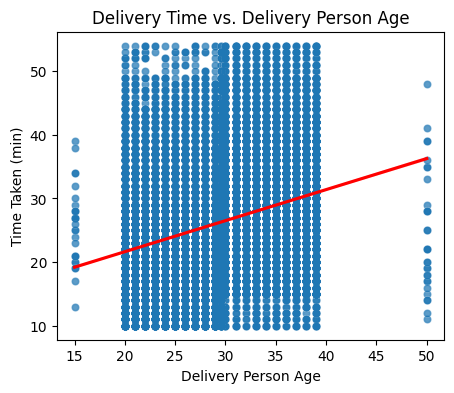

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 4))
sns.scatterplot(x='Delivery_person_Age', y='Time_taken (min)', data=df, alpha=0.6)
sns.regplot(x='Delivery_person_Age', y='Time_taken (min)', data=df, scatter_kws={'s': 20, 'alpha': 0.3}, line_kws={'color': 'red'})
plt.title('Delivery Time vs. Delivery Person Age')
plt.xlabel('Delivery Person Age')
plt.ylabel('Time Taken (min)')
plt.show()

We can see that delivery time increses with the age of the driver

**Hypothesis Test 2: Rating of Drivers do not affect delivery time**

*   **Null Hypothesis (H0):** The mean delivery time is the same both good and not good rated drivers
*   **Alternative Hypothesis (H1):** The mean delivery time is less for drivers with good rating

We will use an T-test to evaluate this hypothesis.

In [ ]:
import scipy.stats as stats

# Create two groups based on 'good_rating'
good_rating_yes = df[df['good_rating'] == 'Yes']['Time_taken (min)'].dropna()
good_rating_no = df[df['good_rating'] == 'No']['Time_taken (min)'].dropna()

# Perform independent samples t-test
t_statistic, p_value = stats.ttest_ind(good_rating_yes, good_rating_no)

print(f"Independent Samples t-test T-statistic: {t_statistic}")
print(f"Independent Samples t-test P-value: {p_value:.4f}")

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("\nSince the p-value is less than the significance level (alpha), we reject the null hypothesis.")
    print("Conclusion: Having a 'good rating' has a statistically significant effect on delivery time.")
else:
    print("\nSince the p-value is greater than the significance level (alpha), we fail to reject the null hypothesis.")
    print("Conclusion: Having a 'good rating' does not have a statistically significant effect on delivery time.")

Independent Samples t-test T-statistic: -75.36845554385182
Independent Samples t-test P-value: 0.0000

Since the p-value is less than the significance level (alpha), we reject the null hypothesis.
Conclusion: Having a 'good rating' has a statistically significant effect on delivery time.


4.633926081044306


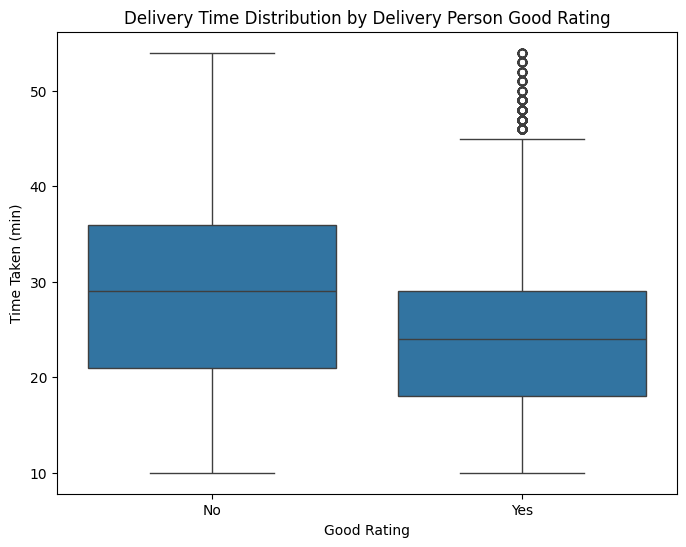

In [ ]:
mean_rating = df['Delivery_person_Ratings'].mean()
print(mean_rating)

# Categorize ratings as 'Yes' or 'No' for 'good rating'
df['good_rating'] = df['Delivery_person_Ratings'].apply(lambda x: 'Yes' if x >= mean_rating else 'No')

# Plot delivery time based on the new 'good rating' column
plt.figure(figsize=(8, 6))
sns.boxplot(x='good_rating', y='Time_taken (min)', data=df)
plt.title('Delivery Time Distribution by Delivery Person Good Rating')
plt.xlabel('Good Rating')
plt.ylabel('Time Taken (min)')
plt.show()

It is very clear that delivery partners having good rating have lower avergae delivery time.

**Hypothesis Test 3: Rating of Drivers and Vehicle Condition**

*   **Null Hypothesis (H0):** Rating of Drivers and vehicle condition are not related
*   **Alternative Hypothesis (H1):** Rating of Drivers and vehicle condition are related
We will use an ANOVA to evaluate this hypothesis.



In [ ]:
import scipy.stats as stats

# Create a list of ratings for each vehicle condition
vehicle_conditions = df['Vehicle_condition'].unique()
ratings_by_vehicle = [df[df['Vehicle_condition'] == condition]['Delivery_person_Ratings'].dropna() for condition in vehicle_conditions]

# Filter out empty arrays before performing ANOVA
ratings_by_vehicle = [data for data in ratings_by_vehicle if not data.empty]

# Perform one-way ANOVA test
f_statistic, p_value = stats.f_oneway(*ratings_by_vehicle)

print(f"ANOVA F-statistic: {f_statistic}")
print(f"ANOVA P-value: {p_value}")

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("\nSince the p-value is less than the significance level (alpha), we reject the null hypothesis.")
    print("Conclusion: Vehicle condition has a statistically significant effect on delivery person ratings.")
else:
    print("\nSince the p-value is greater than the significance level (alpha), we fail to reject the null hypothesis.")
    print("Conclusion: Vehicle condition does not have a statistically significant effect on delivery person ratings.")

ANOVA F-statistic: 75.14518649613274
ANOVA P-value: 1.77169770840855e-48

Since the p-value is less than the significance level (alpha), we reject the null hypothesis.
Conclusion: Vehicle condition has a statistically significant effect on delivery person ratings.


**Hypothesis Test 4: Rating of Drivers and Age**

*   **Null Hypothesis (H0):** There is no correlation between delivery person rating and age.
*   **Alternative Hypothesis (H1):** There is a statistically significant correlation between delivery person rating and age.

We will use a Pearson correlation test to evaluate this hypothesis.

In [ ]:
import scipy.stats as stats

# Perform Pearson correlation test
correlation_coefficient, p_value = stats.pearsonr(df['Delivery_person_Ratings'].dropna(), df['Delivery_person_Age'].dropna())

print(f"Pearson Correlation Coefficient: {correlation_coefficient}")
print(f"Pearson Correlation P-value: {p_value}")

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("\nSince the p-value is less than the significance level (alpha), we reject the null hypothesis.")
    print("Conclusion: There is a statistically significant correlation between delivery person rating and age.")
else:
    print("\nSince the p_value is greater than the significance level (alpha), we fail to reject the null hypothesis.")
    print("Conclusion: There is no statistically significant correlation between delivery person rating and age.")

Pearson Correlation Coefficient: -0.08290159172901941
Pearson Correlation P-value: 1.095213821361008e-69

Since the p-value is less than the significance level (alpha), we reject the null hypothesis.
Conclusion: There is a statistically significant correlation between delivery person rating and age.


**Hypothesis Test 5: Weather conditions do not affect delivery time**

*   **Null Hypothesis (H0):** The mean delivery time is the same across all weather conditions.
*   **Alternative Hypothesis (H1):** The mean delivery time is different for at least one weather condition.

We will use an ANOVA test to evaluate this hypothesis.

In [ ]:


# Create two groups based on 'peak_hour'
peak_hour_yes = df[df['peak_hour'] == 'Yes']['Time_taken (min)'].dropna()
peak_hour_no = df[df['peak_hour'] == 'No']['Time_taken (min)'].dropna()

# Perform independent samples t-test
t_statistic, p_value = stats.ttest_ind(peak_hour_yes, peak_hour_no)

print(f"Independent Samples t-test T-statistic: {t_statistic}")
print(f"Independent Samples t-test P-value: {p_value}")

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("\nSince the p-value is less than the significance level (alpha), we reject the null hypothesis.")
    print("Conclusion: Peak hour has a statistically significant effect on delivery time.")
else:
    print("\nSince the p-value is greater than the significance level (alpha), we fail to reject the null hypothesis.")
    print("Conclusion: Peak hour does not have a statistically significant effect on delivery time.")

Independent Samples t-test T-statistic: 48.29284798554018
Independent Samples t-test P-value: 0.0

Since the p-value is less than the significance level (alpha), we reject the null hypothesis.
Conclusion: Peak hour has a statistically significant effect on delivery time.


**Hypothesis Test 6: delivery time for peak and non peak hour is same**

*   **Null Hypothesis (H0):** The mean delivery time is the same for peak and non-peak hours.
*   **Alternative Hypothesis (H1):** The mean delivery time is different for peak and non-peak hours.

We will use an independent samples t-test to evaluate this hypothesis.

In [ ]:
import scipy.stats as stats

# Drop rows with missing weather conditions for this test
df_weather = df.dropna(subset=['Weather_conditions', 'Time_taken (min)']).copy()

# Create a list of delivery times for each weather condition
weather_conditions = df_weather['Weather_conditions'].unique()
delivery_times_by_weather = [df_weather[df_weather['Weather_conditions'] == condition]['Time_taken (min)'] for condition in weather_conditions]

# Perform one-way ANOVA test
f_statistic, p_value = stats.f_oneway(*delivery_times_by_weather)

print(f"ANOVA F-statistic: {f_statistic}")
print(f"ANOVA P-value: {p_value:.4f}")

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("\nSince the p-value is less than the significance level (alpha), we reject the null hypothesis.")
    print("Conclusion: Weather conditions have a statistically significant effect on delivery time.")
else:
    print("\nSince the p-value is greater than the significance level (alpha), we fail to reject the null hypothesis.")
    print("Conclusion: Weather conditions do not have a statistically significant effect on delivery time.")

ANOVA F-statistic: 606.6517521079851
ANOVA P-value: 0.0000

Since the p-value is less than the significance level (alpha), we reject the null hypothesis.
Conclusion: Weather conditions have a statistically significant effect on delivery time.


**Hypothesis Test 6: City type do not effect delivery time**

*   **Null Hypothesis (H0):** The mean delivery time is the same across all city types.
*   **Alternative Hypothesis (H1):** The mean delivery time is different for at least one city type.

We will use an ANOVA test to evaluate this hypothesis.

In [ ]:
# Create a list of delivery times for each city type
city_types = df['City'].unique()
delivery_times_by_city = [df[df['City'] == city]['Time_taken (min)'].dropna() for city in city_types]

# Filter out empty arrays before performing ANOVA
delivery_times_by_city = [data for data in delivery_times_by_city if not data.empty]


# Perform one-way ANOVA test
f_statistic_city, p_value_city = stats.f_oneway(*delivery_times_by_city)

print("Hypothesis Test 4: City type effect on delivery time")
print(f"ANOVA F-statistic: {f_statistic_city}")
print(f"ANOVA P-value: {p_value_city:.4f}")

# Interpret the results
alpha = 0.05
if p_value_city < alpha:
    print("\nSince the p-value is less than the significance level (alpha), we reject the null hypothesis.")
    print("Conclusion: City type has a statistically significant effect on delivery time.")
else:
    print("\nSince the p-value is greater than the significance level (alpha), we fail to reject the null hypothesis.")
    print("Conclusion: City type does not have a statistically significant effect on delivery time.")

Hypothesis Test 4: City type effect on delivery time
ANOVA F-statistic: 1411.5752849910834
ANOVA P-value: 0.0000

Since the p-value is less than the significance level (alpha), we reject the null hypothesis.
Conclusion: City type has a statistically significant effect on delivery time.


**Hypothesis Test 7: delivery time for peak and non peak hour is same**

*   **Null Hypothesis (H0):** The mean delivery time is the same for peak and non-peak hours.
*   **Alternative Hypothesis (H1):** The mean delivery time is different for peak and non-peak hours.

We will use an independent samples t-test to evaluate this hypothesis.

In [ ]:

# Create two groups based on 'peak_hour'
peak_hour_yes = df[df['peak_hour'] == 'Yes']['Time_taken (min)'].dropna()
peak_hour_no = df[df['peak_hour'] == 'No']['Time_taken (min)'].dropna()

# Perform independent samples t-test
t_statistic_peak, p_value_peak = stats.ttest_ind(peak_hour_yes, peak_hour_no)

print("Hypothesis Test 7: Peak hour effect on delivery time")
print(f"Independent Samples t-test T-statistic: {t_statistic_peak}")
print(f"Independent Samples t-test P-value: {p_value_peak:.4f}")

# Interpret the results
alpha = 0.05
if p_value_peak < alpha:
    print("\nSince the p-value is less than the significance level (alpha), we reject the null hypothesis.")
    print("Conclusion: Peak hour has a statistically significant effect on delivery time.")
else:
    print("\nSince the p-value is greater than the significance level (alpha), we fail to reject the null hypothesis.")
    print("Conclusion: Peak hour does not have a statistically significant effect on delivery time.")

Hypothesis Test 7: Peak hour effect on delivery time
Independent Samples t-test T-statistic: 48.29284798554018
Independent Samples t-test P-value: 0.0000

Since the p-value is less than the significance level (alpha), we reject the null hypothesis.
Conclusion: Peak hour has a statistically significant effect on delivery time.


## Training a ML model to predict Delivery Time based on various features

In [ ]:
display(df.columns)

Index(['ID', 'Delivery_person_ID', 'Delivery_person_Age',
       'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Order_Date', 'Time_Orderd',
       'Time_Order_picked', 'Weather_conditions', 'Road_traffic_density',
       'Vehicle_condition', 'Type_of_order', 'Type_of_vehicle',
       'multiple_deliveries', 'Festival', 'City', 'Time_taken (min)',
       'distance', 'Age_Bin', 'Order_Time_Only', 'Time_Bin', 'peak_hour',
       'month', 'good_rating'],
      dtype='object')